## Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
# Displays first five rows of the data.
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Used to evaluate if there are any missing entries.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# Shows the number of each value in the selected attribute. E.g. Here there are 471 0's, and 35 1's.
housing["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
# Shows basic stats of the data.
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285345,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704445,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.
%matplotlib inline

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

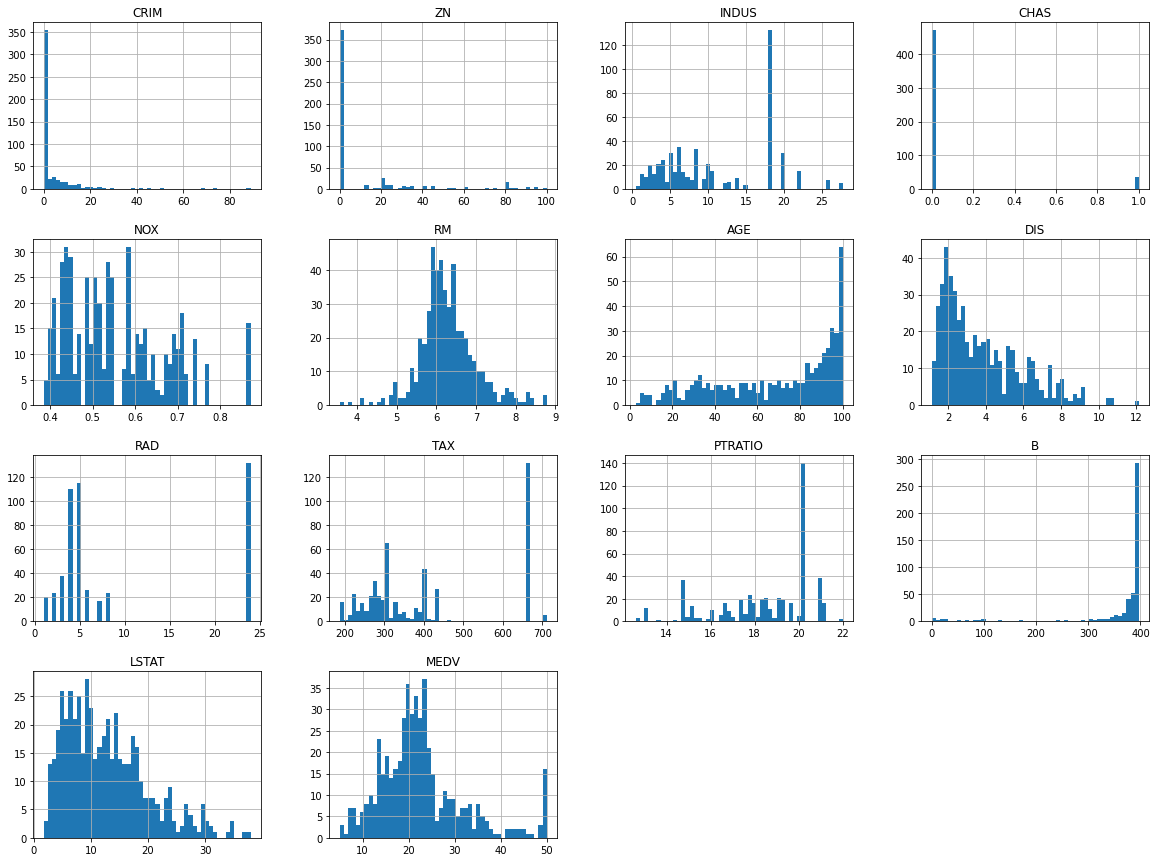

In [8]:
import matplotlib.pyplot as plt

# Visualizing the data in form of a histogram to make the analysis of the data easier.
housing.hist(bins=50, figsize=(20,15))

# Slicing the data into training, and testing data.

### Method-1: Defining the function manually (Present in this code for learning purposes).

In [9]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)  # With the seed reset (every time), the same set of numbers will appear every time.
    shuffle = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffle[:test_set_size]
    train_indices = shuffle[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)

In [11]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 405
Rows in test set: 101


### Method-2: Using the already defined function from sklearn module.

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 404
Rows in test set: 102


### Method-3: Using Stratified Split from sklearn module.

In [13]:
# Above mentioned method splits randomly. Hence it may happen so for binary results that train set may contain all the '0' values, and test set may contain all the '1' values. That will make the model less accurate as it will not know of result '1' as there are no 1's in training set. Hence stratified split will distribute the data points evenly into training and testing set.
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
print("Value count for stratified training data\n{}\n\nValue count for stratified testing data\n{}\n".format(strat_train_set['CHAS'].value_counts(),strat_test_set['CHAS'].value_counts()))

# Here you can see that the ratio of number of 0's to number of 1's in Stratified split is almost same. Hence Stratified split is preferred.
print("376/28 = {}\n95/7 = {}".format(376/28, 95/7))

Value count for stratified training data
0    376
1     28
Name: CHAS, dtype: int64

Value count for stratified testing data
0    95
1     7
Name: CHAS, dtype: int64

376/28 = 13.428571428571429
95/7 = 13.571428571428571


#### Changing the name of strat_train data to 'housing'. So that in future while viewing the data, test data is not revealed.

In [15]:
housing = strat_train_set.copy()

### Looking for Correlations 

In [16]:
# Creating a correlation matrix using 'corr()' function of pandas library.
corr_matrix = housing.corr()

# Checking the correlation of all the attributes with the price attribute here named 'MEDV'. 'ascending=False' is used to display the sorted list in descending order.
corr_matrix['MEDV'].sort_values(ascending=False) 

MEDV       1.000000
RM         0.687183
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

"Now we have got scatterplots of all the attributes w.r.t. eachother. The diagonal graphs don't have a straight line as they should have. Instead they are histograms. If the points are creating a line with a positive slope, the attribute can be regarded as strongly correlated to the other. If it's the same with a negative slope, the attributes are inversely proportional. For e.g. in MEDV vs RM we can see that it is kind of a horizontal line with a positive slope. Which shows that they both are strongly positively correlated."

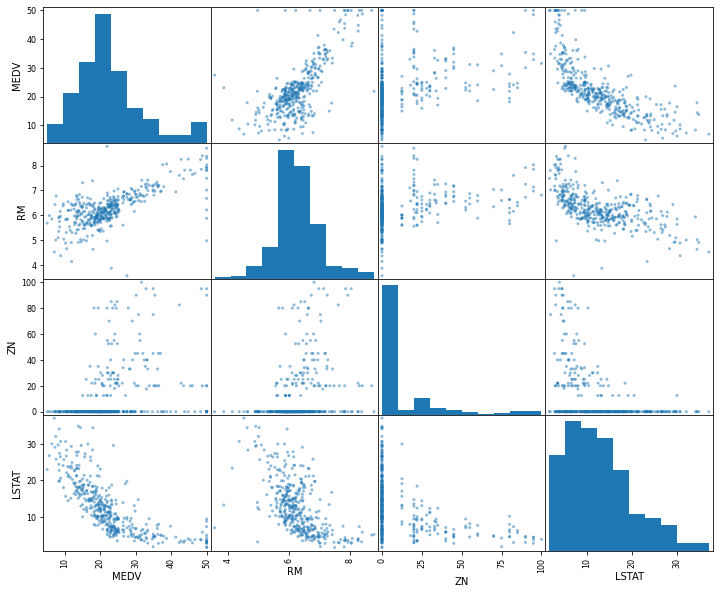

In [17]:
from pandas.plotting import scatter_matrix

# Attributes which have strong correlation with the price i.e. MEDV.
attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(housing[attributes],figsize=(12,10))  #Figsize is randomly selected.

"""Now we have got scatterplots of all the attributes w.r.t. eachother. The diagonal graphs don't have a straight line as they should have. Instead they are histograms. If the points are creating a line with a positive slope, the attribute can be regarded as strongly correlated to the other. If it's the same with a negative slope, the attributes are inversely proportional. For e.g. in MEDV vs RM we can see that it is kind of a horizontal line with a positive slope. Which shows that they both are strongly positively correlated."""

"Viewing a scatterplot helps us in many ways. We can spot the outliers instantly and remove them to make a cleaner dataset. We can also see that there are a few points of value 50 of MEDV which aren't affected by RM. Regardless of the RM they are 50. So possibly the data might be capped. Hence scatterplot also helps to see the inconsistencies in the data."

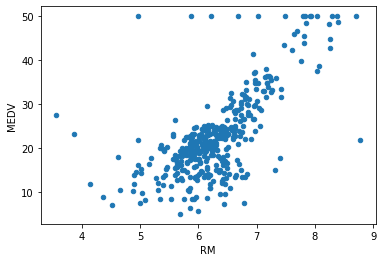

In [18]:
# To view a single graph:
housing.plot(kind="scatter", x="RM", y="MEDV")
"""Viewing a scatterplot helps us in many ways. We can spot the outliers instantly and remove them to make a cleaner dataset. We can also see that there are a few points of value 50 of MEDV which aren't affected by RM. Regardless of the RM they are 50. So possibly the data might be capped. Hence scatterplot also helps to see the inconsistencies in the data."""

### Trying out attribute combinations

In [19]:
# Sometimes two attributes can be combined to create a new strongly related attribute. Here we divide number of room (RM) with tax (TAX) to get a new attribute Tax per room(TAXRM).
housing['TAXRM'] = housing['TAX']/housing['RM']
housing.head()  # TAXRM column is now added at the last index.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [20]:
# We can see that the new attribute is quite well correlated to the MEDV.
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.687183
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.523451
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

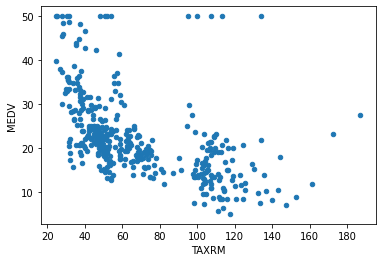

In [21]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV")  # Strongly correlated.

### Separating the features, and labels

In [22]:
# We are ignoring the new combined attribute added earlier ('TAXRM'). It was just to demonstrate how to add custom combined labels.

housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

### Filling the missing values

In [23]:
# For educational purposes, 5 entries from the 'RM' column have been deleted. Original dataset is without missing entries is named 'data - Copy.csv'.
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280742,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715380,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [24]:
# Ways to deal with missing values:
# Option-1: Get rid of the missing data names.
# Option-2: Get rid of the whole attribute.
# Option-3: Replace the null values with some other value(0, mean or median).

In [25]:
# Option-1: Get rid of the missing data names.
# 'dropna' function will delete all the missing data points.
# housing.dropna(subset=['RM'], inplace=True)  --- This function will change the main data too. To do this after 'subset...' type 'inplace=True'.
housing.dropna(subset=['RM'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


In [26]:
# Option-2: Get rid of the whole attribute i.e. whole column.
housing.drop("RM", axis=1)  #Place 'inplace=True' to change the original dataset.

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [27]:
# Option-3: Replace the null values with some other value(0, mean or median).

# Method-1

median = housing["RM"].median()  # Storing the value of median in a variable.
housing["RM"].fillna(median)  # Original dataframe remains unchanged.

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [28]:
# Option-3: Replace the null values with some other value(0, mean or median).

# Method-2 (preferred): Using the SimpleImputer class from sklearn.

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [29]:
# Shows the median values for each attribute/column.
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [30]:
X = imputer.transform(housing)  #All the null values will be filled with median, and whole data is transformed to a numpy array.
type(X)

numpy.ndarray

In [31]:
housing_tr = pd.DataFrame(X, columns=housing.columns)  #Converting the numpy array of imputer to pandas dataframe.
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279879,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710971,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, three types of classes present.
1. Estimators: It will estimate a parameter based on a dataset.
E.g. Imputer.
    It has a fit() method, and a transform() method. The fit method calculates the mean and variance of each of the features present in our data. The transform method transforms all the features using the respective mean and variance.
    
    
2. Transformers: Transformer transforms the input data ( X ) in some ways.
It also has a convenience function called fit_transform() which fits and transforms simultaneously and more efficiently compared to using the methods separately.


3. Predictors: Predicts the value of a parameter based on a given dataset. LinearRegression model is an example of predictor. fit() and predict() are two common methods. It also gives a score() function which evaluates the outputs.

## Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. Feature scaling is done before feeding the data to the model. What it essentially does is that it decreases the range of the data such that, values of all attributes lie withing the same range.

Two primary types of feature scaling methods:

##### 1. Min-Max Scaling (Normalization)

Formula: (value - min)/(max - min)

Class: Sklearn provides a class named MinMaxScaler for this.

##### 2. Standardization

Formula: (value - mean)/std

Class: Sklearn provides a class named StandardScaler for this.

Note: This method is more viable as a single outlier won't affect the whole data too much. For example, if an outlier replaced the true minimum of the data, whole data will be scaled wrongly by MinMax Scaling. Standardization eliminates that shortcoming.

## Creating a Pipeline
A machine learning pipeline is a way to codify and automate the workflow it takes to produce a machine learning model. Machine learning pipelines consist of multiple sequential steps that do everything from data extraction and preprocessing to model training and deployment.

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline accepts a list of different pipelines.
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
# ... Other features might be added to the pipeline too.    
    ('std_scaler', StandardScaler())
])

# Note: Earlier we imputed the data without using a pipeline. But in big firms, everything is done using a pipeline. Data may be seen using commands like head() or describe(). But the cleaning, and preprocessing of data is done completely through pipeline.

In [33]:
housing_num_tr = my_pipeline.fit_transform(housing)
# What the 'my_pipeline.fit_transform(housing)' does is, it first fits the first class in the data (here that being 'imputer') to the data, then it transforms the data and passes to the next class, here that being StandardScaler class. Does the fit and transform for it. It then repeats the fit_transform for all classes mentioned in the pipeline.
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Model selection

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

# LinearRegression gave RMSE (Root Mean Squared Error) of 4.80 which is not good. Hence this model wasn't used.
# model = LinearRegression()

# DecisionTreeRegressor gave RMSE of 4.33.
# model = DecisionTreeRegressor()

model = RandomForestRegressor()

model.fit(housing_num_tr, housing_labels)  # 'housing_labels' described in cell 22.

RandomForestRegressor()

## Evaluating the model

In [35]:
# Test set will not be used. Test set will be used only and only when the model is selected. This is initial testing phase.

from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)

# Calculating the mean squared error
mse = mean_squared_error(housing_labels, housing_predictions)

# Calculating the root mean squared error
rmse = np.sqrt(mse)

# MSE of zero means that the model has overfitted. To evaluate the model better, we'll use cross validation.
rmse

1.1479416598657985

## Using better evaluation method: Cross Validation
Cross validation will divide the data in the specified number of batches called folds. Let's say 10. Means this will be 10 fold cross validation. Then it will first train the model on the whole data except on the first batch, and then evaluate it w.r.t. the first batch. Same will be done for 2nd, 3rd, 4th, and so on batches. Basically one of the batches will act as a test batch, and rest of the batches will act as train set.

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)  #cross_val_score(model name, feature dataset, label dataset, scoring parameter, number of folds)
rmse_scores = np.sqrt(-scores)  # Since scores will be negative as we used neg_mse above, we calculate the square root of negative scores making the scores positive.

rmse_scores  # Decision Tree is performing better than LinearRegression. 
# Linear Regression Cross Validation Results: 
# (array([4.25477964, 4.23864587, 5.13327178, 3.8296539 , 5.1659492 ,
# 4.39558443, 7.46812595, 5.4320159 , 4.08921104, 6.07641564]))

array([2.80903376, 2.69780234, 4.38332815, 2.66755923, 3.29577613,
       2.64847975, 4.73273884, 3.33114135, 3.26520388, 3.20686782])

In [37]:
def print_scores(scores):
    print("Scores:", scores)
    print("\nMean:", scores.mean())
    print("\nStandard Deviation:", scores.std())

In [38]:
print_scores(rmse_scores)

Scores: [2.80903376 2.69780234 4.38332815 2.66755923 3.29577613 2.64847975
 4.73273884 3.33114135 3.26520388 3.20686782]

Mean: 3.3037931257311435

Standard Deviation: 0.6830240420854597


## Saving the model

In [39]:
from joblib import dump, load
dump(model, 'DT_Model.joblib')  # Saves a file with the specified name of the model specified in the folder.

['DT_Model.joblib']

## Testing the model on the test data

In [40]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()

prepared_X_test = my_pipeline.transform(X_test)
final_predictions = model.predict(prepared_X_test)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.9267848635072067